In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
img0 = np.array([[0,0,1], [0,1,0], [1,0,0]] )

In [4]:
print(img0)

[[0 0 1]
 [0 1 0]
 [1 0 0]]


In [5]:
print(img0.shape)

(3, 3)


In [6]:
print("img0 size = %s,%s" %(img0.shape[0],img0.shape[1]))

img0 size = 3,3


In [7]:
import matplotlib.pyplot as plt

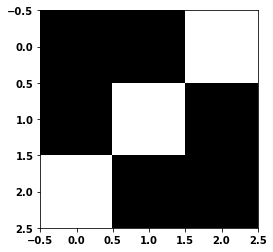

In [8]:
plt.imshow(img0, cmap='gray')
# plt.imshow(img0)

In [9]:
# read camera
cap = cv2.VideoCapture(0)
# read video
#cap  = cv2.VideoCapture("/Users/zhaomingming/Documents/HTC/核心课/CVFundamentals/week1/How Computer Vision Works.mp4")
#cap = cv2.VideoCapture("../How Computer Vision Works.mp4")
# cap = cv2.VideoCapture("How Computer Vision Works.mp4")

True


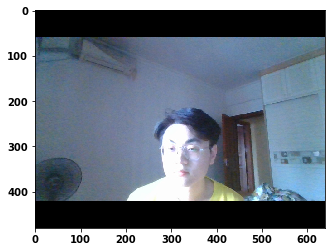

In [10]:
ret, frame = cap.read() #ret:return_value, frame:图像帧
print(cap.isOpened())

# cv2.cvtColor()
# cv2.COLOR_BGB2RGB


plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [11]:
print(frame.shape)

(480, 640, 3)


In [12]:
cap.release()

In [27]:
img = cv2.imread("lena.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [28]:
print(img.shape)

(512, 512, 3)


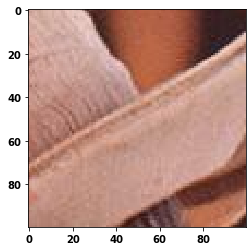

In [30]:
# range of instrest

roi = img[100:200, 300:400]
plt.imshow(roi)


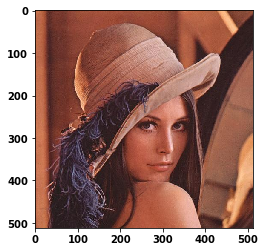

In [31]:
plt.imshow(img, cmap='gray')

In [32]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

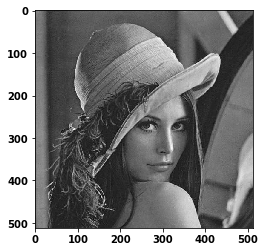

In [33]:
plt.imshow(img_gray, cmap='gray')

In [45]:
img_BGR = cv2.imread("lena.jpg")
img_hsv = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV)

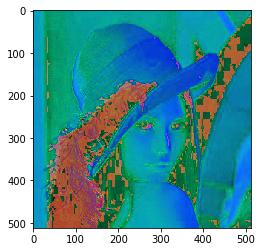

In [46]:
plt.imshow(img_hsv)

(300, 500, 3)

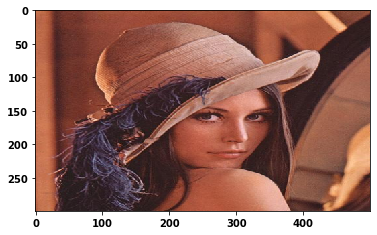

In [34]:
# 列，行
img = cv2.resize(img,(500, 300))
plt.imshow(img)
img.shape

[196 114  76]
[196 114  76]


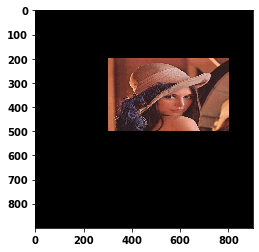

In [39]:
# 移动 （重点）
M = np.float32([[1,0,300], [0,1,200]])

print(img[0,0])
img_1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_1 = cv2.warpAffine(img_1, M, (900,900)) # 刚体变换

plt.imshow(img_1)
print(img_1[200,300])

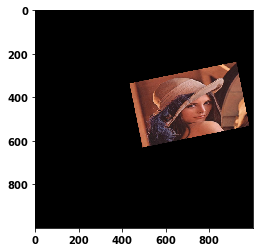

In [48]:
# 图像的旋转变换和拉伸变换 Affine:刚体变换
# pts1 = np.float32([[50,50], [200,50], [50,200]])
# pts2 = np.float32([[10,100], [200,50], [100,250]])
# M = cv2.getAffineTransform(pts1, pts2)  # 旋转斜切矩阵，pts1变到pts2
# print(M)

theta = -0.2
M = np.float32([[np.cos(theta), -np.sin(theta), 100], [np.sin(theta), np.cos(theta), 200]]) # 旋转
# M = np.float32([[1.2,0,0], [0,1.2,0]])  # 放缩
cols = 1000
rows = 1000
dst = cv2.warpAffine(img_1, M, (cols,rows))
plt.imshow(dst)

[[ 3.01223786e-01  2.61933727e-02 -1.85711013e+01]
 [ 1.33801017e-02  3.21122440e-01 -2.16222443e+01]
 [ 6.76353865e-05 -1.70147592e-03  1.00000000e+00]]


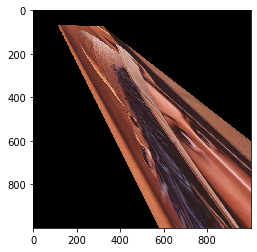

In [165]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[100,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
print(M)
# 拉伸变换或者透视变换
dst = cv2.warpPerspective(img_1,M,(1000,1000))
plt.imshow(dst)


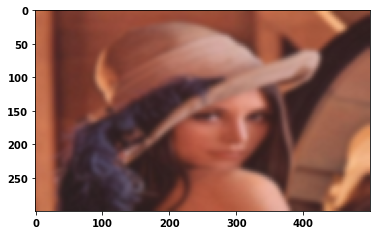

In [62]:
# 图像模糊与锐化
img = cv2.GaussianBlur(img, (99,99), 1, 0)
plt.imshow(img)

[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]


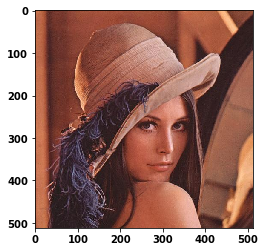

In [65]:
img = cv2.imread("lena.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
kernel = np.ones((3,3), np.float32)/8
# kernel = -kernel
kernel[0,:]=[-1,-1,-1]
kernel[1,:]=[0,0,0]
kernel[2,:]=[1,1,1]

print(kernel)
plt.imshow(img)

(512, 512, 3)
[0 0 0]


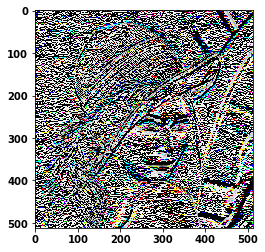

In [66]:
print(img.shape)
result = cv2.filter2D(img, -1, kernel)
result.shape
# result = cv2.filter2D(result, -1, kernel)
print(result[0,0])
plt.imshow(result*255)

In [67]:
wm = cv2.imread("watermask.png")
img = cv2.imread("lena.jpg")

(300, 300, 3)


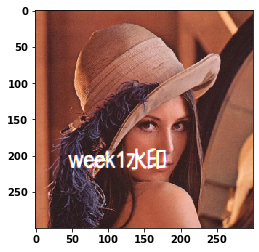

In [72]:
wm = cv2.resize(wm, (300,300))
wm = 255 - wm # 变成白色
img1 = cv2.resize(img, (300,300)) # 与水印图片一致
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
print(wm.shape)
plt.imshow(cv2.add(wm,img1)) # 整合两张图片
plt.imshow(cv2.addWeighted(wm, 2, img1, 1, 0))  # 加水印
 

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


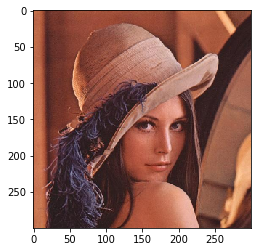

In [113]:
# 均值滤波 3*3  随着核大小逐渐变大，会让图像变得更加模糊

kernel = np.ones((3,3), np.float32)/9
# kernel = -kernel
kernel[0,:]=[1/9,1/9,1/9]
kernel[1,:]=[1/9,1/9,1/9]
kernel[2,:]=[1/9,1/9,1/9]

print(kernel)
plt.imshow(img1) # 原图

(512, 512, 3)
[ 76 114 196]


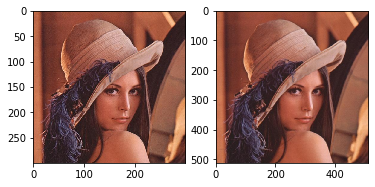

In [130]:
print(img.shape)
result = cv2.filter2D(img, -1, kernel)
result.shape
# result = cv2.filter2D(result, -1, kernel)
print(result[0,0])
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(result) # 滤波后的图像

(512, 512, 3)
(512, 512, 3)


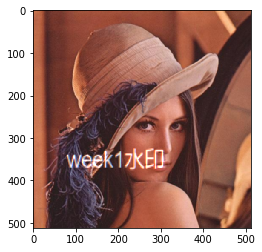

In [131]:
wm = cv2.imread("watermask.png")
wm = cv2.resize(wm, (512,512))
wm = 255 - wm # 变成白色
img2 = cv2.resize(result, (512,512)) # 与水印图片一致
print(wm.shape)
print(img2.shape)
plt.imshow(cv2.add(wm, img2)) # 整合两张图片
plt.imshow(cv2.addWeighted(wm, 1, img2, 1, 0))  # 加水印